In [1]:
# P341 Nuclear Physics and Instrumentation Lab

# Assignment of Monte-Carlo Methods
# Date of assignment: 17/02/2022
# Date of submission: 14/03/2022

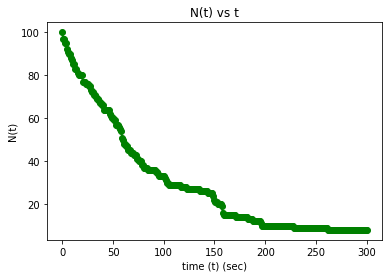

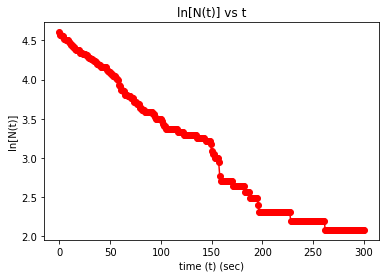

In [2]:
# Question 1
# Write a program to simulate radioactive decay, using the information that a nucleus undergoes radioactive decay in time Δt with probability p = αΔt, with αΔt<<1.

# You may want to proceed as follows:
# Consider a system initially having N_0 stable nuclei. How does the number of parent nuclei, N, change in time ?

# Graph the number of remaining nuclei as a function of time for the following cases:
# 1. N_0 = 100, α = 0.01 s-1, Δt = 1 sec
# 2. N_0 = 5000, α = 0.03 s-1, Δt = 1 sec

# Show the results on both linear and logarithmic scales for times between 0 and 300 secs.
# In addition, plot the same graphs (the expected curves) given dN = -αNdt i.e., N(t) = N0 exp(-αt)

# [Solution code]
import random
import math
import matplotlib.pyplot as plt
def decay_simulator(N_0,alpha,T_min=0,T_max=300,dt=1):
    T_list = [T_min + x * dt for x in range(int((T_max+dt)/dt))]
    N_list = [0 for t in T_list]
    N_list[0], p = N_0, alpha * dt
    for i in range(1,len(T_list)):
        N_list[i] = N_list[i-1]
        for j in range(N_list[i-1]):
            r_val = random.random()
            if r_val < p:
                N_list[i] -= 1
    return N_list, T_list

T, dt = 300, 1
N_0, alpha = 100, 0.01
N_list, T_list = decay_simulator(N_0,alpha,0,T,dt)
#print("Time \t\t N(t)")
#for i in range(T):
#    if i >= 100:
#        print(T_list[i], "\t\t",N_list[i])
#    else:
#        print(T_list[i], "\t\t\t",N_list[i])
plt.plot(T_list,N_list,'g-o')
plt.title('N(t) vs t')
plt.xlabel('time (t) (sec)')
plt.ylabel('N(t)')
plt.show()
lnN_list = []
for n in N_list:
    lnN_list.append(math.log(n))
plt.plot(T_list,lnN_list,'r-o')
plt.title('ln[N(t)] vs t')
plt.xlabel('time (t) (sec)')
plt.ylabel('ln[N(t)]')
plt.show()

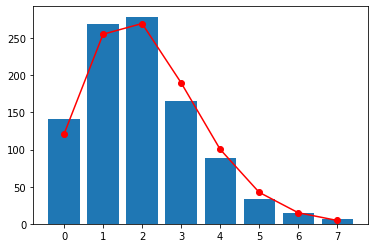

In [3]:
# Question 2
# Modify the above program to simulate an experiment that counts the number of decays observed in a time interval T.

# Allow the experiment to be repeated and the histogram the distribution of number of decays for the following two cases:
# a) N_0 = 500, a = 4x10^(-5) s-1, Δt = 10 sec, T=100 sec
# b) N_0 = 500, a = 2x10^(-5) s-1, Δt = 10 sec, T=100 sec

# In each case, show the distribution using 1000 experiments and overlay the expected Poisson distribution.

#[Solution code]
import random
import math
import matplotlib.pyplot as plt
import statistics as stat
def decay_simulator_detector(N_0,alpha,T_min,T_max,dt):
    T_list = [T_min + x * dt for x in range(int((T_max+dt)/dt))]
    N_list = [0 for t in T_list]
    N_list[0], p, decay_val = N_0, alpha * dt, 0
    for i in range(1,len(T_list)):
        N_list[i] = N_list[i-1]
        for j in range(N_list[i-1]):
            r_val = random.random()
            #print(p, r_val, r_val < p)
            if r_val < p:
                N_list[i] -= 1
                decay_val += 1
    return N_list, T_list, decay_val

T, dt = 100, 10
N_0, alpha = 500, (4*(10**(-5)))
D_list = [0 for i in range(1000)]
for i in range(len(D_list)):
    N_list, T_list, D_list[i] = decay_simulator_detector(N_0,alpha,0,T,dt)
#print("Time \t\t N(t)")
#for i in range(len(T_list)):
#    if i >= 100:
#        print(T_list[i], "\t\t",N_list[i])
#    else:
#        print(T_list[i], "\t\t\t",N_list[i])
#print("Total decays in 100 sec:", decay_val)
#print(D_list)
var, freq_list = stat.variance(D_list), []
for i in range(max(D_list)):
    freq_list.append(D_list.count(i))

def plotmaker(var,freq_list,D_list):
    k_list = [i for i in range(max(D_list))]
    f_k_list = [(1000)*(var**k)*(math.exp(-var))*(1/math.factorial(k)) for k in k_list]
    plt.bar(k_list,freq_list)
    plt.plot(k_list,f_k_list,'r-o')
    plt.show()

def plotmaker1(var,D_list):
    k_list = [i for i in range(max(D_list))]
    f_k_list = [(1000)*(var**k)*(math.exp(-var))*(1/math.factorial(k)) for k in k_list]
    plt.hist(D_list,bin=16)
    plt.plot(k_list,f_k_list,'r-o')
    plt.show()
plotmaker(var,freq_list,D_list)
#plotmaker1(var,D_list)

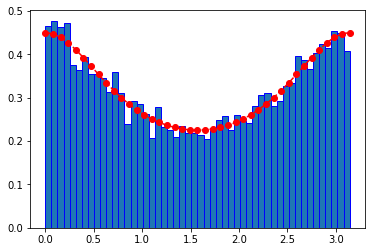

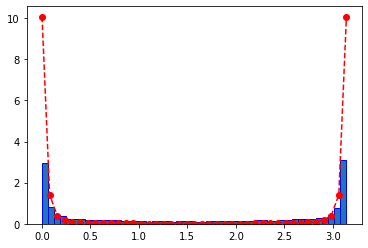

In [2]:
# Question 3
# Write a program to generate the distribution f(θ)=1./(sin²θ+ acos²θ), where 0<θ<π.
# Compare your results using the inversion technique and the acceptance-rejection technique: 10000 trials each for values of a=0.5 and 0.001.
# You should overlay the plots for four different f(θ) distributions, properly normalized.

#[Solution code]
import random
import math
import matplotlib.pyplot as plt
import statistics as stat

def theta(u,a):
    return math.atan(((a)**0.5)*(math.tan(math.pi*(u))))

def p(x,a):
  return 1/((math.sin(x))**2 + a*(math.cos(x)**2))
   

iterations, theta_list, a = 10000, [], 0.5
for t in range(iterations):
    u = random.random()
    if u < 0.5:
        theta_list.append(theta(u,a))
    else:
        theta_list.append(theta(u,a) + math.pi)

x_list = [0.025*i*math.pi for i in range(41)]
p_list = [p(x,a)*((a)**(0.5)/math.pi) for x in x_list]
plt.plot(x_list,p_list,'r--o')
plt.hist(theta_list, bins=50,ec='blue', density='true')
plt.show()

b = 0.001
for t in range(iterations):
    u = random.random()
    if u < 0.5:
        theta_list.append(theta(u,b))
    else:
        theta_list.append(theta(u,b) + math.pi)

p_list = [p(x,b)*((b)**(0.5)/math.pi) for x in x_list]

plt.plot(x_list,p_list,'r--o')
plt.hist(theta_list, bins=50,ec='blue',density='true')
plt.show()


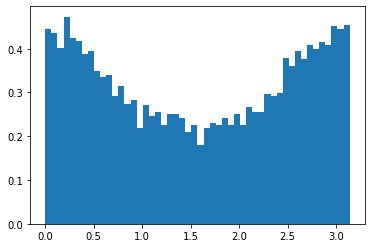

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
import math


def p(x):
  return 1/((math.sin(x))**2 + 0.5*(math.cos(x)**2))
   




def accept_reject(N):
    zmin = 0
    zmax = 3.14
    fbig = 3

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (zmax-zmin)*np.random.rand() + zmin
        y = np.random.rand()
        if y < p(t)/ fbig:
            n_accept += 1
            x_list.append(t)
    return x_list


x = accept_reject(10000)
bins, edges, patches = plt.hist(x, bins=50, density='true')